In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('lab_zaliczenie/data/sex_weight_haight.csv')
df.sample(5)

,Gender,Height,Weight
6005,Female,60.666822,121.598168
1036,Male,68.165837,173.456455
8758,Female,63.390357,128.617638
4126,Male,73.680958,223.609136
6404,Female,64.706716,161.677903


In [3]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [4]:
df_male = df[df['Gender'] == 'Male']
df_female = df[df['Gender'] == 'Female']

In [5]:
df_male.describe()

,Height,Weight
count,5000.000000,5000.000000
mean,69.026346,187.020621
std,2.863362,19.781155
min,58.406905,112.902939
25%,67.174679,173.887767
50%,69.027709,187.033546
75%,70.988744,200.357802
max,78.998742,269.989699


In [9]:
male_max_w = max(df_male['Weight'])
male_max_h = max(df_male['Height'])
male_w = df_male['Weight'].to_numpy()
male_h = df_male['Height'].to_numpy()

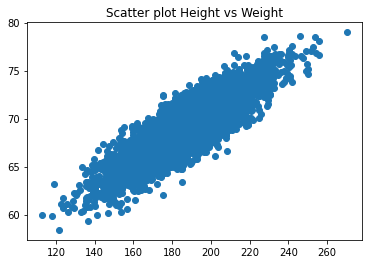

In [63]:
plt.title("Scatter plot Height vs Weight")
plt.scatter(male_w, male_h)
plt.show()

In [120]:
interval_w  = 1
start_w = 100
male_bins_w = np.arange(start_w, male_max_w, interval_w)
male_w_by_interval = df_male.groupby(pd.cut(df_male['Weight'], male_bins_w)).count()

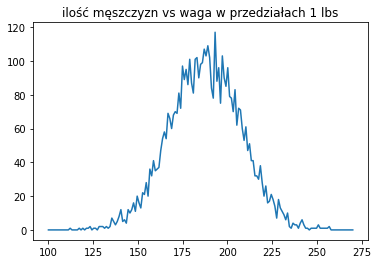

In [123]:
male_n_w = np.linspace(start_w, start_w + len(male_bins_w), len(male_bins_w) - 1)
male_w_grouped = male_w_by_interval['Weight']
plt.title(f"ilość męszczyzn vs waga w przedziałach {interval_w} lbs")
plt.plot(male_n_w, male_w_grouped)
plt.show()

In [113]:
interval_h  = 1
start = 55
male_bins_h = np.arange(start, male_max_h, interval_h)
male_h_by_interval = df_male.groupby(pd.cut(df_male['Height'], male_bins_h)).count()

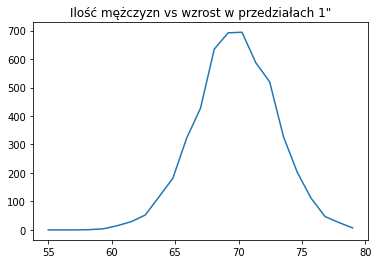

In [114]:
male_n_h = np.linspace(start, start + len(male_bins_h), len(male_bins_h) - 1)
male_h_grouped = male_h_by_interval['Height']
plt.title(f"Ilość mężczyzn vs wzrost w przedziałach {interval_h} inch")
plt.plot(male_n_h, male_h_grouped)
plt.show()

In [43]:
df_female.describe()

,Height,Weight
count,5000.000000,5000.000000
mean,63.708774,135.860093
std,2.696284,19.022468
min,54.263133,64.700127
25%,61.894441,122.934096
50%,63.730924,136.117583
75%,65.563565,148.810926
max,73.389586,202.237214


In [11]:
female_max_w = max(df_female['Weight'])
female_max_h = max(df_female['Height'])
female_w = df_female['Weight'].to_numpy()
female_h = df_female['Height'].to_numpy()

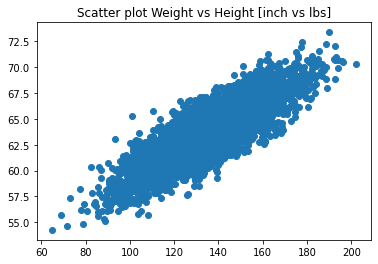

In [125]:
plt.title("Scatter plot Weight vs Height [inch vs lbs]")
plt.scatter(female_w, female_h)
plt.show()

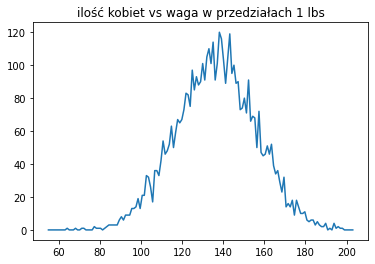

In [130]:
interval_w  = 1
start_w = 55
female_bins_w = np.arange(start_w, female_max_w, interval_w)
female_w_by_interval = df_female.groupby(pd.cut(df_female['Weight'], female_bins_w)).count()

female_n_w = np.linspace(start_w, start_w + len(female_bins_w), len(female_bins_w) - 1)
female_w_grouped = female_w_by_interval['Weight']
plt.title(f"ilość kobiet vs waga w przedziałach {interval_w} lbs")
plt.plot(female_n_w, female_w_grouped)
plt.show()

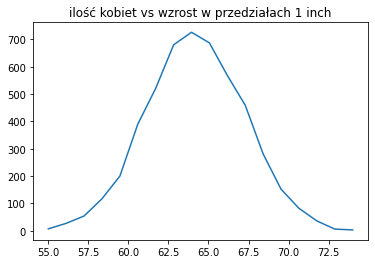

In [135]:
female_interval_h  = 1
female_start_h = 55
female_bins_h = np.arange(female_start_h, female_max_h, female_interval_h)
female_w_by_interval = df_female.groupby(pd.cut(df_female['Height'], female_bins_h)).count()

female_n_h = np.linspace(female_start_h, female_start_h + len(female_bins_h), len(female_bins_h) - 1)
female_h_grouped = female_w_by_interval['Height']
plt.title(f"ilość kobiet vs wzrost w przedziałach {female_interval_h} inch")
plt.plot(female_n_h, female_h_grouped)
plt.show()

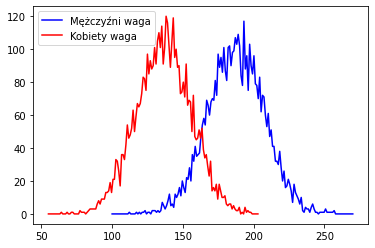

In [142]:
plt.plot(male_n_w, male_w_grouped, "-b", label="Mężczyźni waga")
plt.plot(female_n_w, female_w_grouped, "-r", label="Kobiety waga")
plt.legend(loc="upper left")
plt.show()

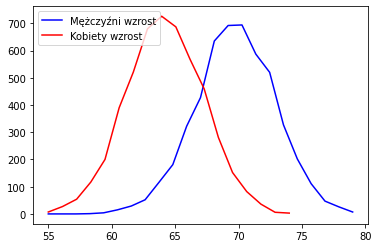

In [143]:
plt.plot(male_n_h, male_h_grouped, "-b", label="Mężczyźni wzrost")
plt.plot(female_n_h, female_h_grouped, "-r", label="Kobiety wzrost")
plt.legend(loc="upper left")
plt.show()

In [ ]:
standard_deviation = abs(sigma - np.std(s))